# **Lab 3(a)**
# Neural Networks


---


Total Points: **85**

Tentative Weightage : **2%**

Submission Deadline :  **25th March 2021, 23:59 hours**

Link to the dataset: https://drive.google.com/file/d/1G12DoncT43hYmA72ZyY2xhyukrhnDTBn/view?usp=sharing

---



General Instructions:

---



1. You have to do this lab individually
2. You may use **sklearn, seaborn, matplotlib, pandas, Tensorflow 2.x**
3. All the code should be submitted in the form of a single Jupyter notebook itself.
4. Points for each sub-section are mentioned in the appropriate question.
5. Make sure to begin early as a few experiments may consume more time to run.
6. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/)
7. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
8. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
9. You are expected to submit your **inferences** (preferably in a text block) and not just an error free code.
10. Students are expected to follow the **honor code** of the class.
11. In case of any queries regarding Lab 3, please mail 2019aim1003@iitrpr.ac.in


In [1]:
# Import the necessary libraries

import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import statistics
import random

# If using Google Colab, use the following package to display the image
# If running on your local system, cv2.imshow shall work fine
# If running on your local system please comment the line below
from google.colab.patches import cv2_imshow

In [2]:
IMG_HEIGHT = 40
IMG_WIDTH = 40

# Dataset

The dataset used here is a synthetic alphabet recognition dataset. It consists of images of lowercase English alphabets, generated with handwritten-fonts. All images are single channel (grayscale) and have size 40 * 40. <br>

The dataset has the following directory structure:

<pre>
<b>CR-Dataset</b>
|__ <b>train</b>
    |______ <b>a</b>: [a_1.png, a_2.png, a_3.png ....]
    |______ <b>b</b>: [b_1.png, b_2.png, b_3.png ....]
        .
        .
        .
    |______ <b>y</b>: [y_1.png, y_2.png, y_3.png ....]    
    |______ <b>z</b>: [z_1.png, z_2.png, z_3.png ....]   
    
|__ <b>validation</b>
    |______ <b>a</b>: [a_221.png, a_322.png, a_353.png ....]
    |______ <b>b</b>: [b_241.png, b_352.png, b_363.png ....]
        .
        .
        .
    |______ <b>y</b>: [y_221.png, y_322.png, y_353.png ....]
    |______ <b>z</b>: [z_241.png, z_352.png, z_363.png ....]
    
|__ <b>test</b>: [a_521.png, b_272.png, g_433.png ....]
</pre>
*Note:* The file names are for representation only, they may differ in the original dataset.<br>


Extract the paths of these directories onto different variables to facilitate accessing the dataset and thereby training the model.

In [3]:

from google.colab import drive
drive.mount('/content/MyDrive', force_remount = True)

Mounted at /content/MyDrive


In [4]:
#Add the paths for train, validation and test directories

train_dir_path="/content/MyDrive/MyDrive/CS503-ML/CR-Dataset/Train"
validation_dir_path="/content/MyDrive/MyDrive/CS503-ML/CR-Dataset/Validation"
test_dir_path="/content/MyDrive/MyDrive/CS503-ML/CR-Dataset/Test"


# Generate Image Batches


---


Fitting the model on entire training set may be memory and computation inefficient. Hence we generate batches of images to be processed by the model. `ImageDataGenerator` class in tensorflow facilitates this. 

Describe the various arguments in the instantiation of `tensorflow.keras.preprocessing.image.ImageDataGenerator` object.


---

**3 Points**

---




Ans:- The different arguments are as follows:

* featurewise_center -	Boolean. Used to set input mean to 0 over the dataset, feature-wise.
* samplewise_center-	Boolean. Used to set each sample mean to 0.

* featurewise_std_normalization-	Boolean. Used to divide inputs by std of the dataset, feature-wise.
* samplewise_std_normalization-	Boolean. Divide each input by its std.
* zca_epsilon-	epsilon for ZCA whitening. Default is 1e-6.
* zca_whitening-	Boolean. Apply ZCA whitening.
* rotation_range-	Int. Degree range for random rotations.
* width_shift_range-	Float, 1-D array-like or int
 * float: fraction of total width, if < 1, or pixels if >= 1.
 * 1-D array-like: random elements from the array.
 * int: integer number of pixels from interval (-width_shift_range, +width_shift_range)
 * With width_shift_range=2 possible values are integers [-1, 0, +1], same as with width_shift_range=[-1, 0, +1], while with width_shift_range=1.0 possible values are floats in the interval [-1.0, +1.0).
* height_shift_range-	Float, 1-D array-like or int
 * float: fraction of total height, if < 1, or pixels if >= 1.
 * 1-D array-like: random elements from the array.
 * int: integer number of pixels from interval (-height_shift_range, +height_shift_range)
 * With height_shift_range=2 possible values are integers [-1, 0, +1], same as with height_shift_range=[-1, 0, +1], while with height_shift_range=1.0 possible values are floats in the interval [-1.0, +1.0).
* brightness_range-	Tuple or list of two floats. Range for picking a brightness shift value from.
* shear_range-	Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
* zoom_range-	Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].
* channel_shift_range-	Float. Range for random channel shifts.
* fill_mode	-One of {"constant", "nearest", "reflect" or "wrap"}. Default is 'nearest'. Points outside the boundaries of the input are filled according to the given mode:
 * 'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)
 * 'nearest': aaaaaaaa|abcd|dddddddd
 * 'reflect': abcddcba|abcd|dcbaabcd
 * 'wrap': abcdabcd|abcd|abcdabcd
* cval-	Float or Int. Value used for points outside the boundaries when fill_mode = "constant".
* horizontal_flip-	Boolean. Randomly flip inputs horizontally.
* vertical_flip-	Boolean. Randomly flip inputs vertically.
* rescale-	rescaling factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (after applying all other transformations).
* preprocessing_function-	function that will be applied on each input. The function will run after the image is resized and augmented. The function should take one argument: one image (Numpy tensor with rank 3), and should output a Numpy tensor with the same shape.
* data_format-	Image data format, either "channels_first" or "channels_last". "channels_last" mode means that the images should have shape (samples, height, width, channels), "channels_first" mode means that the images should have shape (samples, channels, height, width).
* validation_split-	Float. Fraction of images reserved for validation (strictly between 0 and 1).
* dtype-	Dtype to use for the generated arrays.





Describe the arguments of `flow_from_directory()` method of the `tensorflow.keras.preprocessing.image.ImageDataGenerator` object. 

---

**3 Points**

---
The arguments are as follows-
* directory -	string, path to the target directory. It should contain one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside each of the subdirectories directory tree will be included in the generator. See this script for more details.
* target_size -	Tuple of integers (height, width), defaults to (256,256). The dimensions to which all images found will be resized.
* color_mode -	One of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1, 3, or 4 channels.
* classes -	Optional list of class subdirectories (e.g. ['dogs', 'cats']). Default: None. If not provided, the list of classes will be automatically inferred from the subdirectory names/structure under directory, where each subdirectory will be treated as a different class (and the order of the classes, which will map to the label indices, will be alphanumeric). The dictionary containing the mapping from class names to class indices can be obtained via the attribute class_indices.
* class_mode -	One of "categorical", "binary", "sparse", "input", or None. Default: "categorical". Determines the type of label arrays that are returned: - "categorical" will be 2D one-hot encoded labels, - "binary" will be 1D binary labels, "sparse" will be 1D integer labels, - "input" will be images identical to input images (mainly used to work with autoencoders). - If None, no labels are returned (the generator will only yield batches of image data, which is useful to use with model.predict()). 
* batch_size -	Size of the batches of data (default: 32).
* shuffle -	Whether to shuffle the data (default: True) If set to False, sorts the data in alphanumeric order.
* seed -	Optional random seed for shuffling and transformations.
* save_to_dir -	None or str (default: None). This allows to optionally specify a directory to which to save the augmented pictures being generated (useful for visualization).
* save_prefix	- Str. Prefix to use for filenames of saved pictures (only relevant if save_to_dir is set).
* save_format -	One of "png", "jpeg" (only relevant if save_to_dir is set). Default: "png".
* follow_links -	Whether to follow symlinks inside class subdirectories (default: False).
* subset -	Subset of data ("training" or "validation") if validation_split is set in ImageDataGenerator.
* interpolation -	Interpolation method used to resample the image if the target size is different from that of the loaded image. Supported methods are "nearest", "bilinear", and "bicubic". 

Create a function that returns a generator object which shall fetch batches of images from the specified directory. This function shall be reused for fetching images from train and validation directories.



---

**3 Points**


---




In [5]:
from keras.preprocessing.image import ImageDataGenerator


In [6]:
def get_generator_from_dir(directory_path, batch_size_):
    # Insert your code here
    data = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
    
    data_batch_generator = data.flow_from_directory(
    directory_path,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    color_mode="grayscale",
    batch_size= batch_size_,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
    return data_batch_generator

Describe the arguments of `flow_from_dataframe()` method of the `tensorflow.keras.preprocessing.image.ImageDataGenerator` object. 

---

**3 Points**

---

Create a function that returns a generator object which shall fetch batches of images from the specified directory using a dataframe that has information about images and their labels. This function shall be reused for fetching images from test directory.



---

**3 Points**


---
* dataframe	Pandas dataframe containing the filepaths relative to directory (or absolute paths if directory is None) of the images in a string column. It should include other column/s depending on the class_mode: - if class_mode is "categorical" (default value) it must include the y_col column with the class/es of each image. Values in column can be string/list/tuple if a single class or list/tuple if multiple classes. - if class_mode is "binary" or "sparse" it must include the given y_col column with class values as strings. - if class_mode is "raw" or "multi_output" it should contain the columns specified in y_col. - if class_mode is "input" or None no extra column is needed.
* directory	string, path to the directory to read images from. If None, data in x_col column should be absolute paths.
* x_col	string, column in dataframe that contains the filenames (or absolute paths if directory is None).
* y_col	string or list, column/s in dataframe that has the target data.
* weight_col	string, column in dataframe that contains the sample weights. Default: None.
* target_size	tuple of integers (height, width), default: (256, 256). The dimensions to which all images found will be resized.
* color_mode	one of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1 or 3 color channels.
* classes	optional list of classes (e.g. ['dogs', 'cats']). Default is None. If not provided, the list of classes will be automatically inferred from the y_col, which will map to the label indices, will be alphanumeric). The dictionary containing the mapping from class names to class indices can be obtained via the attribute class_indices.
* class_mode	one of "binary", "categorical",
"input", "multi_output", "raw", sparse" or None. Default: "categorical". Mode for yielding the targets:
 * "binary": 1D numpy array of binary labels,
 * "categorical": 2D numpy array of one-hot encoded labels. Supports multi-label output.
 * "input": images identical to input images (mainly used to work with autoencoders),
 * "multi_output": list with the values of the different columns,
 * "raw": numpy array of values in y_col column(s),
 * "sparse": 1D numpy array of integer labels, - None, no targets are returned (the generator will only yield batches of image data, which is useful to use in model.predict()).
* batch_size	size of the batches of data (default: 32).
* shuffle	whether to shuffle the data (default: True)
* seed	optional random seed for shuffling and transformations.
* save_to_dir	None or str (default: None). This allows to optionally specify a directory to which to save the augmented pictures being generated (useful for visualizing).
* save_prefix	str. Prefix to use for filenames of saved pictures (only relevant if save_to_dir is set).
* save_format	one of "png", "jpeg" (only relevant if save_to_dir is set). Default: "png".
* subset	Subset of data ("training" or "validation") if validation_split is set in ImageDataGenerator.
* interpolation	Interpolation method used to resample the image if the target size is different from that of the loaded image. Supported methods are "nearest", "bilinear", and "bicubic". If PIL version 1.1.3 or newer is installed, "lanczos" is also supported. If PIL version 3.4.0 or newer is installed, "box" and "hamming" are also supported. By default, "nearest" is used.
* validate_filenames	Boolean, whether to validate image filenames in x_col. If True, invalid images will be ignored. Disabling this option can lead to speed-up in the execution of this function. Defaults to True.
* **kwargs	legacy arguments for raising deprecation warnings.



In [7]:
def get_generator_from_dataframe(directory_path, dataframe, batch_size_):
    # Insert your code here
    data=ImageDataGenerator(rescale=1./255.)
    data_batch_generator = data.flow_from_dataframe(
    dataframe,
    directory= directory_path,
    x_col="Image",
    y_col="Label",
    batch_size=batch_size_,
    seed=42,
    shuffle=False,
    class_mode="categorical",
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    color_mode="grayscale",

    )
    return data_batch_generator

Create a function that returns a dataframe having image file names and their corresponding class labels for a folder. This will help in creating generator from a dataframe.



---

**2 Points**


---




In [8]:
import os
import glob
from os import walk
import pandas as pd

def get_dataframe(folder_name):

    # Insert code to give you list of all the image files in folder
    # Insert code to get list of labels from list of images 
    # (Hint: every image file name has its label name as prefix)
    # Make a dataframe with two columns - Image(file name) and Label (class label)
    #display and return the dataframe

    dir_list = os.listdir(folder_name)
    print(dir_list)
    list_ = []

    for image in dir_list:
      label = image.split('_')[0]
      list_.append([image, label])
    
    df = pd.DataFrame(list_, columns =['Image', 'Label'])
    display(df)
    return df

# train_df = get_dataframe(test_dir_path)


Describe the arguments for the following functions callable on a `tensorflow.keras.Sequential` model object :

1. add() **[3 Points]**

> The add() is used to add a layer on top of the layer stack.It has a argument called 
* layer - which is the layer instance. The function raises TypeError if layer is not a layer instance, ValueError if the input shape is not  known by the layer argument, or if the layer argument has multiple output tensors, or is already connected somewhere


2. compile() **[3 Points]**

> This function configures the model for training. It has got the following arguments:
 * optimizer - `String`  It is the name of the  optimizer instance. There are many optimizers in `tf.keras.optimizers` like Adam, Adagrad, Adamax , etc
 * loss - It is `String` (name of objective function), objective function or `tf.keras.losses.Loss instance`. Loss functions are typically created by instantiating a loss class (e.g. keras.losses.SparseCategoricalCrossentropy). All losses are also provided as function handles.  It returns a weighted loss float tensor. If a custom Loss instance is used and reduction is set to NONE, return value has the shape [batch_size, d0, .. dN-1] ie. per-sample or per-timestep loss values; otherwise, it is a scalar. If the model has multiple outputs, we can use a different loss on each output by passing a dictionary or a list of losses. The loss value that will be minimized by the model will then be the sum of all individual losses.
 * metrics- List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a `tf.keras.metrics.Metric` instance. `tf.keras.metrics`. 
 * loss_weights -  list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs. The loss value that will be minimized by the model will then be the weighted sum of all individual losses, weighted by the loss_weights coefficients. If a list, it is expected to have a 1:1 mapping to the model's outputs. If a dict, it is expected to map output names (strings) to scalar coefficients. This is Optional argument.
 * weighted_metrics	- List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
 * run_eagerly - 	Bool. Defaults to False. If True, this Model's logic will not be wrapped in a tf.function.
 * steps_per_execution - Int. Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead. 	
 * **kwargs	- Arguments supported for backwards compatibility only.


3. fit() **[3 Points]**

> Trains the model for a fixed number of epochs (iterations on a dataset). Foloowing are the arguments in fit():
* x - It is the Input data. It could be:
A Numpy array (or array-like), or a list of arrays (in case the model has multiple inputs).
A TensorFlow tensor, or a list of tensors (in case the model has multiple inputs).
A dict mapping input names to the corresponding array/tensors, if the model has named inputs.
A tf.data dataset. Should return a tuple of either (inputs, targets) or (inputs, targets, sample_weights).
A generator or keras.utils.Sequence returning (inputs, targets) or (inputs, targets, sample_weights)
* y - It is the Target Data. Like the input data x, it could be either Numpy array(s) or TensorFlow tensor(s). It should be consistent with x (cannot have Numpy inputs and tensor targets, or inversely). If x is a dataset, generator, or keras.utils.Sequence instance, y should not be specified
* batch_size - Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
* epochs - Integer. Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided. 
* verbose - 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 
* callbacks - List of keras.callbacks.Callback instances. List of callbacks to apply during training.
* validation_split - Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided, before shuffling. This argument is not supported when x is a dataset, generator or keras.utils.Sequence instance.
* validation_data	- Data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data.
* shuffle - Boolean (whether to shuffle the training data before each epoch) or str (for 'batch'). This argument is ignored when x is a generator.
* class_weight - Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
* sample_weight - Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only). Can either pass a flat (1D) Numpy array with the same length as the input samples (1:1 mapping between weights and samples), or in the case of temporal data, can pass a 2D array with shape (samples, sequence_length), to apply a different weight to every timestep of every sample. This argument is not supported when x is a dataset, generator, or keras.utils.Sequence instance.
* initial_epoch	 nteger. Epoch at which to start training (useful for resuming a previous training run).
* steps_per_epoch - Integer or None. Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in the dataset divided by the batch size, or 1 if that cannot be determined. If x is a tf.data dataset, and 'steps_per_epoch' is None, the epoch will run until the input dataset is exhausted. 
* validation_steps - Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch. If 'validation_steps' is None, validation will run until the validation_data dataset is exhausted. 
* validation_batch_size - Integer or None. Number of samples per validation batch. If unspecified, will default to batch_size. Do not specify the validation_batch_size if the data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).
* validation_freq - Only relevant if validation data is provided. Integer or collections_abc.Container instance (e.g. list, tuple, etc.). If an integer, specifies how many training epochs to run before a new validation run is performed,
* max_queue_size - 	Integer. Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
* workers - Integer. Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1. If 0, will execute the generator on the main thread.
* use_multiprocessing	- Boolean. Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 	




4. predict()  **[3 Points]**

> This function generates output predictions for the input samples.
Following are its arguments:
* x - Input samples. It could be:
 * A Numpy array (or array-like), or a list of arrays (in case the model has multiple inputs).
 *A TensorFlow tensor, or a list of tensors (in case the model has multiple inputs).
 *A tf.data dataset.
 *A generator or keras.utils.Sequence instance. 
* batch_size - Integer or None. Number of samples per batch. If unspecified, batch_size will default to 32. Do not specify the batch_size if the data is in the form of dataset, generators, or keras.utils.Sequence instances (since they generate batches).
* verbose - Verbosity mode, 0 or 1.
* steps -Total number of steps (batches of samples) before declaring the prediction round finished. Ignored with the default value of None. If x is a tf.data dataset and steps is None, predict will run until the input dataset is exhausted.
* callbacks - List of keras.callbacks.Callback instances. List of callbacks to apply during prediction. 
* max_queue_size - nteger. Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
* workers - Integer. Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1. If 0, will execute the generator on the main thread.
* use_multiprocessing	-  Boolean. Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 	



Describe the arguments used when instantiating the following `tensorflow.keras.layers` :
1. Conv2D() **[3 Points]**

> It is the 2D convolution layer (e.g. spatial convolution over images).
It has got the following Arguments:
* filters -	Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
* kernel_size -	An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
* strides -	An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. 
* padding -	one of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
* data_format	- A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch_size, height, width, channels) while channels_first corresponds to inputs with shape (batch_size, channels,height, width).
* dilation_rate	- an integer or tuple/list of 2 integers, specifying the dilation rate to use for dilated convolution. 
* groups -	A positive integer specifying the number of groups in which the input is split along the channel axis. Each group is convolved separately with filters / groups filters. The output is the concatenation of all the groups results along the channel axis. Input channels and filters must both be divisible by groups.
* activation -	Activation function to use. If we dont specify anything, no activation is applied 
* use_bias -	Boolean, whether the layer uses a bias vector.
* kernel_initializer - Initializer for the kernel weights matrix
* bias_initializer - Initializer for the bias vector.
* kernel_regularizer - Regularizer function applied to the kernel weights matrix 
* bias_regularizer -	Regularizer function applied to the bias vector 
* activity_regularizer -	Regularizer function applied to the output of the layer (its "activation") 
* kernel_constraint	- Constraint function applied to the kernel matrix 
* bias_constraint-	Constraint function applied to the bias vector 

2. MaxPooling2D() **[3 Points]**

> Max pooling operation for 2D spatial data.
* pool_size -
integer or tuple of 2 integers, window size over which to take the maximum. (2, 2) will take the max value over a 2x2 pooling window. If only one integer is specified, the same window length will be used for both dimensions.
* strides -
Integer, tuple of 2 integers, or None. Strides values. Specifies how far the pooling window moves for each pooling step. If None, it will default to pool_size.
* padding -
One of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
* data_format-
A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch, height, width, channels) while channels_first corresponds to inputs with shape (batch, channels, height, width).

3. Flatten()  **[3 Points]**

> Flattens the input. Does not affect the batch size.
It has got the argument- 
* data_format -
A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch, ..., channels) while channels_first corresponds to inputs with shape (batch, channels, ...). 

4. Dense()  **[3 Points]**

> It is the regular densely-connected NN layer.
Following are its arguments:
* units -
Positive integer, dimensionality of the output space.
* activation -
Activation function to use. If we don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
* use_bias -
Boolean, whether the layer uses a bias vector.
* kernel_initializer -
Initializer for the kernel weights matrix.
* bias_initializer -
Initializer for the bias vector.
* kernel_regularizer -
Regularizer function applied to the kernel weights matrix.
* bias_regularizer -
Regularizer function applied to the bias vector.
* activity_regularizer -
Regularizer function applied to the output of the layer (its "activation").
* kernel_constraint -
Constraint function applied to the kernel weights matrix.
* bias_constraint -
Constraint function applied to the bias vector.

5. Dropout() **[3 Points]**

> The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.
Following are the arguments:
* rate -
Float between 0 and 1. Fraction of the input units to drop.
* noise_shape -
1D integer tensor representing the shape of the binary dropout mask that will be multiplied with the input. For instance, if inputs have shape (batch_size, timesteps, features) and we want the dropout mask to be the same for all timesteps, we can use noise_shape=(batch_size, 1, features).



# Defining the model architecture

---



We have defined our prediction model architecture here. **Please dont make any changes to the two blocks below.**

In [ ]:
def build_model(dropout_probability = 0,LR=1e-4):
    
    # Creating a Keras sequential model
    model = tf.keras.models.Sequential()
    
    # Adding layers 
    model.add(tf.keras.layers.Flatten(input_shape=(IMG_WIDTH,IMG_HEIGHT, 1)))
    model.add(tf.keras.layers.Dense(512, activation='tanh',kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.Dense(512, activation='relu',kernel_initializer='glorot_uniform'))
    model.add(tf.keras.layers.Dense(512, activation='tanh',kernel_initializer='he_uniform',))
    model.add(tf.keras.layers.Dropout(dropout_probability))
    model.add(tf.keras.layers.Dense(26,activation='softmax'))
    
    # Optimizers, loss function and performance metrics
    opt = tf.keras.optimizers.Adam(learning_rate=LR)
    cat_loss = tf.keras.losses.CategoricalCrossentropy()
    acc_metrics = [tf.keras.metrics.CategoricalAccuracy()]
    
    # Compiling the model
    model.compile(optimizer=opt, loss=cat_loss, metrics=acc_metrics)
    model.summary()
    
    return model

In [9]:
#  Variables needed for subsequent sections
num_epochs = 40


labels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

# Best Learning Rate determination

---



Now we are ready to start working with the model. The hyperparameters we would like you to experiment are learning rate of the optimizer, batch size and dropout probability. We shall start with the  experimentation of **learning rate**. Discuss the impact of learning rate on model training and performance.


---
**5 Points**


---




In [ ]:


def determine_best_learning_rate():
    learning_rates = [1e-3,1e-4,1e-5]
    avg_val_accuracies = []

    # Insert your code here to get generators that fetch batches from train and validation directories (use batch size 16)
    train_generator = get_generator_from_dir(train_dir_path ,16)
    validation_generator = get_generator_from_dir(validation_dir_path , 16)
    for l_rate in learning_rates:
        
        # Insert your code here to build a model with the current learning rate
        model  = build_model(0,l_rate)

        print(model.summary)
        # Insert your code here to train the model using the training set and validate using the validation set
        H = model.fit(
                train_generator, steps_per_epoch= train_generator.samples // 16, epochs=num_epochs, verbose=1, callbacks=None,
                validation_data=validation_generator, validation_steps= validation_generator.samples // 16
                )        
        # Insert your code here to find the average validation accuracy for this model setting and append it to the maintained list
        avg_val_acc = statistics.mean(H.history['val_categorical_accuracy'])
        avg_val_accuracies.append(avg_val_acc)
    # Insert your code here to figure out the learning rate which gives the highest average validation accuracy. Print the value and return it.
    best_lr =  learning_rates[avg_val_accuracies.index(max(avg_val_accuracies))]

    return best_lr 

# determine_best_learning_rate() is being called here
best_lr = determine_best_learning_rate()

Found 20220 images belonging to 26 classes.
Found 374 images belonging to 26 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               819712    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 26)                13338     
Total params: 1,358,362
Trainable pa

In [ ]:

print(best_lr)

0.0001


# Best Dropout Probability determination

---


Use the best batch size determined in the previous section for the subsequent sections. We shall now do experimentation of **dropout probability** parameter. Discuss the impact of dropout probability on model performance.


---
**5 Points**


---

In [ ]:
def determine_best_dropout_probability():
    dropout_probs = [0,0.25,0.5,0.75]
    avg_val_accuracies = []

    # Insert your code here to get generators that fetch batches from train and validation directories (use batch size 16)
    train_generator = get_generator_from_dir(train_dir_path ,16)
    validation_generator = get_generator_from_dir(validation_dir_path , 16)   

    for prob in dropout_probs:
        
        
        # Insert your code here to build a model with the current dropout probability
        model  = build_model(prob,1e-4)


        # Insert your code here to train the model using the training set and validate using the validation set
        H = model.fit(
                train_generator, steps_per_epoch= train_generator.samples // 16, epochs=num_epochs, verbose=1, callbacks=None,
                validation_data=validation_generator, validation_steps= validation_generator.samples // 16
                )
       
        # Insert your code here to find average validation accuracy for this model setting and append it to the maintained list
        avg_val_acc = statistics.mean(H.history['val_categorical_accuracy'])
        avg_val_accuracies.append(avg_val_acc)

    # Insert your code here to figure out the dropout probability which gives the highest average validation accuracy. Print the value and return it.
    best_prob =  dropout_probs[avg_val_accuracies.index(max(avg_val_accuracies))]
    print("Best probability" , best_prob)
    return best_prob


    
# determine_best_dropout_probability() is being called here
best_prob = determine_best_dropout_probability()

Found 20220 images belonging to 26 classes.
Found 374 images belonging to 26 classes.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               819712    
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 26)                13338     
Total params: 1,358,362
Trainable 

# Best Batch Size determination

---


Use the best learning rate and best dropout probablity determined in the previous sections for the subsequent sections. We shall now do experimentation of **batch size** parameter. Discuss the impact of batch size on model performance.


---
**5 Points**


---


In [ ]:
def determine_best_batch_size():
    batch_sizes = [16,32,64]
    avg_val_accuracies = []

    

    for bsize in batch_sizes:
        
        # Insert your code here to build a model with the default dropout probability and learning rate
        model  = build_model()
      
        # Insert your code here to get generators that fetch batches from train and validation directories as per current batch size
        train_generator = get_generator_from_dir(train_dir_path , bsize)
        validation_generator = get_generator_from_dir(validation_dir_path , bsize)   
        
        # Insert your code here to train the model using the training set and validate using the validation set
        H = model.fit(
                train_generator, steps_per_epoch= train_generator.samples // bsize, epochs=num_epochs, verbose=1, callbacks=None,
                validation_data=validation_generator, validation_steps= validation_generator.samples // bsize
                )
       
        # Insert your code here to find average validation accuracy for this model setting and append it to the maintained list
        avg_val_acc = statistics.mean(H.history['val_categorical_accuracy'])
        avg_val_accuracies.append(avg_val_acc)            

    # Insert your code here to figure out the batch size which gives the highest average validation accuracy. Print the value and return it.
    best_batch_size =  batch_sizes[avg_val_accuracies.index(max(avg_val_accuracies))]
    print("Best Batch Size" , best_batch_size)
    return best_batch_size
    


# determine_best_batch_size() is being called here
best_batch_size = determine_best_batch_size()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 512)               819712    
_________________________________________________________________
dense_41 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_42 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 26)                13338     
Total params: 1,358,362
Trainable params: 1,358,362
Non-trainable params: 0
___________________________________________

# Images Visualization

---


Now we shall train our model with best hyperparameters. As a first step we need to plot images to have visual understanding of the data. This image visualization shall be reused. Hence create a custom **function to visualize images**.


---
**2 Points**


---




In [25]:

def visualise_image(path):
  # reading the image
  image = cv2.imread(path)
  cv2_imshow(image)





# Make generators ready

---

Create generators to fetch batches from train and validation directory. For test samples, create with the help of get_dataframe() method. You may use best batch size determined earlier.



---
**3 Points**


---




In [14]:
train_generator = get_generator_from_dir(train_dir_path , best_batch_size)
validation_generator = get_generator_from_dir(validation_dir_path , best_batch_size) 


test_df = get_dataframe(test_dir_path)
test_generator = get_generator_from_dataframe(test_dir_path,test_df,best_batch_size)

Found 20220 images belonging to 26 classes.
Found 374 images belonging to 26 classes.
['a_10.png', 'a_30.png', 'a_846.png', 'a_847.png', 'a_852.png', 'a_860.png', 'a_879.png', 'a_895.png', 'a_906.png', 'a_909.png', 'a_911.png', 'a_917.png', 'a_925.png', 'a_937.png', 'a_939.png', 'a_940.png', 'a_941.png', 'a_947.png', 'b_1026.png', 'b_1028.png', 'b_1033.png', 'b_1034.png', 'b_1051.png', 'b_11.png', 'b_12.png', 'b_25.png', 'b_29.png', 'b_969.png', 'b_970.png', 'b_974.png', 'c_1102.png', 'c_1118.png', 'c_1123.png', 'c_1130.png', 'c_1140.png', 'c_1151.png', 'c_1160.png', 'c_1163.png', 'c_1164.png', 'c_1169.png', 'c_1176.png', 'c_1188.png', 'c_1191.png', 'c_1193.png', 'c_1203.png', 'c_29.png', 'd_1220.png', 'd_1221.png', 'd_1238.png', 'd_1239.png', 'd_1246.png', 'd_1250.png', 'd_1254.png', 'd_1268.png', 'd_1284.png', 'd_1285.png', 'd_1292.png', 'd_1294.png', 'd_1300.png', 'd_1305.png', 'd_1314.png', 'd_1324.png', 'd_1326.png', 'd_1339.png', 'd_31.png', 'd_8.png', 'e_1347.png', 'e_1351.png',

,Image,Label
0,a_10.png,a
1,a_30.png,a
2,a_846.png,a
3,a_847.png,a
4,a_852.png,a
...,...,...
411,z_4082.png,z
412,z_4091.png,z
413,z_4092.png,z
414,z_4119.png,z


Found 416 validated image filenames belonging to 26 classes.


# Class-wise samples Plot

---

Plot the class-wise number of samples present in training, validation and test directory. Also, visualise 5 samples each from train, validation and test directories.



---
**5 Points (3+2)**


---




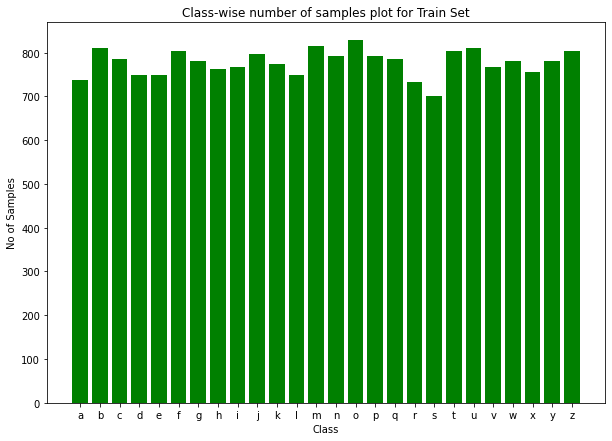

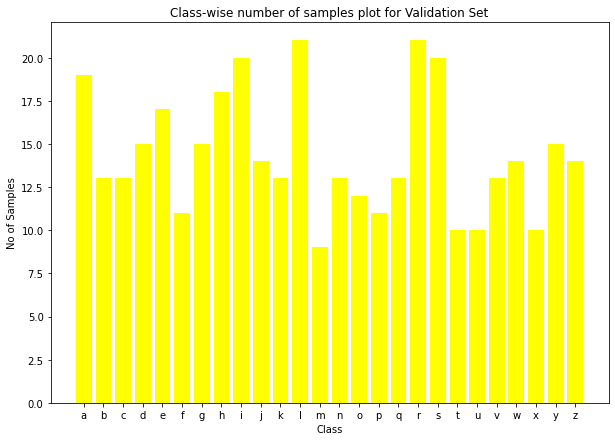

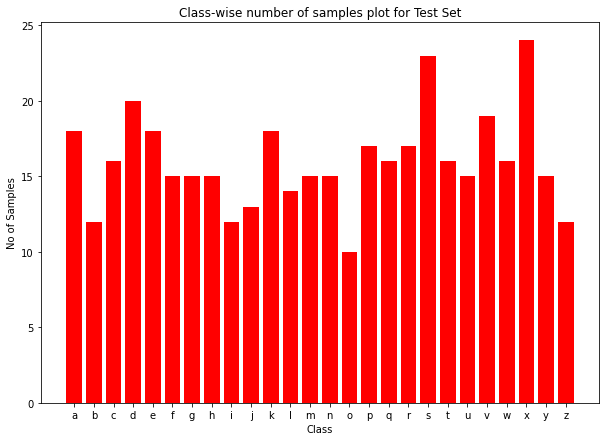

In [28]:
#classwise  number of samples present in training, validation and test directory

# function for finding number of samples per class in train & val set
def getSamplesPerClass(path , labels):
  values = []
  for label in labels: 
    x = len( os.listdir(os.path.join(path, label)) ) 
    values.append(x)

  return values


num_samples_train = getSamplesPerClass(train_dir_path , labels)

num_samples_val = getSamplesPerClass(validation_dir_path , labels)

# finding number of samples per class in test set
num_samples_test = []

for label in labels:
  c =0
  for l in test_df["Label"]:
    if l == label:
      c = c +1
  num_samples_test.append(c)


# Generating the plot class-wise number of samples present in training, validation and test directory

# creating the bar plot 
fig1 = plt.figure(figsize=(10, 7))
plt.bar(labels, num_samples_train ,  color = "green")  
plt.xlabel("Class") 
plt.ylabel("No of Samples") 
plt.title("Class-wise number of samples plot for Train Set") 
plt.show()

fig2 = plt.figure(figsize=(10, 7))
plt.bar(labels, num_samples_val ,  color = "yellow")  
plt.xlabel("Class") 
plt.ylabel("No of Samples") 
plt.title("Class-wise number of samples plot for Validation Set") 
plt.show()

fig3 = plt.figure(figsize=(10, 7))
plt.bar(labels, num_samples_test , color = "red")  
plt.xlabel("Class") 
plt.ylabel("No of Samples") 
plt.title("Class-wise number of samples plot for Test Set") 
plt.show()


Visualising from Train dataset


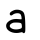

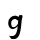

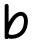

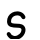

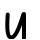

In [29]:
#visualising from train dataset
print("Visualising from Train dataset")
visualise_image("/content/MyDrive/MyDrive/CS503-ML/CR-Dataset/Train/a/a_12.png")
visualise_image("/content/MyDrive/MyDrive/CS503-ML/CR-Dataset/Train/g/g_1.png")
visualise_image("/content/MyDrive/MyDrive/CS503-ML/CR-Dataset/Train/b/b_0.png")
visualise_image("/content/MyDrive/MyDrive/CS503-ML/CR-Dataset/Train/s/s_0.png")
visualise_image("/content/MyDrive/MyDrive/CS503-ML/CR-Dataset/Train/u/u_0.png")



Visualising from Validation dataset


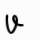

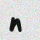

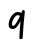

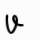

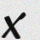

In [30]:
print("Visualising from Validation dataset")

visualise_image("/content/MyDrive/MyDrive/CS503-ML/CR-Dataset/Validation/v/v_3541.png")
visualise_image("/content/MyDrive/MyDrive/CS503-ML/CR-Dataset/Validation/n/n_2595.png")
visualise_image("/content/MyDrive/MyDrive/CS503-ML/CR-Dataset/Validation/q/q_16.png")
visualise_image("/content/MyDrive/MyDrive/CS503-ML/CR-Dataset/Validation/v/v_3541.png")
visualise_image("/content/MyDrive/MyDrive/CS503-ML/CR-Dataset/Validation/x/x_3781.png")

Visualising from Test dataset


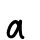

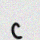

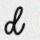

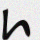

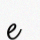

In [31]:
print("Visualising from Test dataset")

visualise_image("/content/MyDrive/MyDrive/CS503-ML/CR-Dataset/Test/a_10.png")
visualise_image("/content/MyDrive/MyDrive/CS503-ML/CR-Dataset/Test/c_1160.png")
visualise_image("/content/MyDrive/MyDrive/CS503-ML/CR-Dataset/Test/d_1239.png")
visualise_image("/content/MyDrive/MyDrive/CS503-ML/CR-Dataset/Test/h_1778.png")
visualise_image("/content/MyDrive/MyDrive/CS503-ML/CR-Dataset/Test/e_1436.png")



# Build Model

---
Now build the model as per the best learning rate and dropout probability value determined earlier. Summarize and plot the model architecture.

---

**2 Points**

---




Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               819712    
_________________________________________________________________
dense_33 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_34 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 26)                13338     
Total params: 1,358,362
Trainable params: 1,358,362
Non-trainable params: 0
____________________________________________

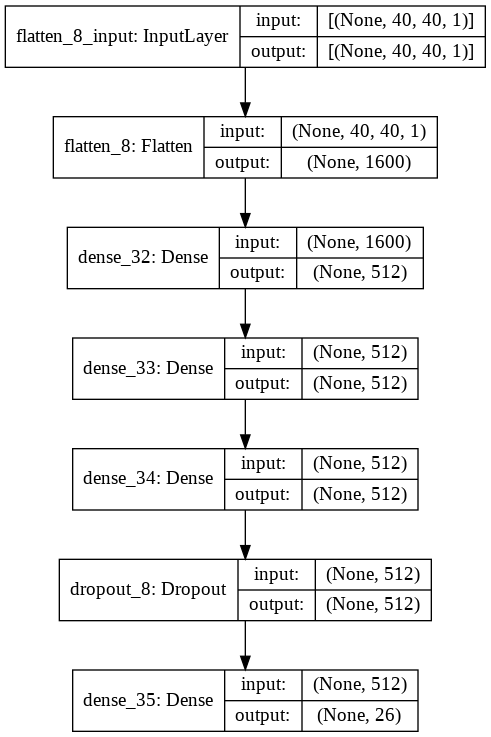

In [ ]:
# Insert your code here to build the model as per the best learning rate and dropout probability values determined earlier
from keras.utils.vis_utils import plot_model

model = build_model(best_prob, best_lr)

# Insert your code here to print the model summary
model.summary()

#Insert your code to plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



# Training the Model

---
Train the model built with best hyperparameter settings. Generate a **Plot** of Epochs Vs. training and validation accuracy. Also generate a similar plot for training and validation loss. Discuss your **inferences** from the plot.


---

**7 Points**


---



In [ ]:
# Insert your code here to train the model with best hyperparameter settings using training set and validate using the validation set (1 Point)

H = model.fit(
        train_generator, steps_per_epoch= train_generator.samples // best_batch_size, epochs=num_epochs, verbose=1, callbacks=None,
        validation_data=validation_generator, validation_steps= validation_generator.samples // best_batch_size
        ) 






Epoch 1/40
1263/1263 [==============================] - 33s 26ms/step - loss: 2.9557 - categorical_accuracy: 0.1434 - val_loss: 2.3253 - val_categorical_accuracy: 0.3152
Epoch 2/40
1263/1263 [==============================] - 33s 26ms/step - loss: 2.1330 - categorical_accuracy: 0.3671 - val_loss: 2.1149 - val_categorical_accuracy: 0.4076
Epoch 3/40
1263/1263 [==============================] - 32s 26ms/step - loss: 1.7297 - categorical_accuracy: 0.4829 - val_loss: 1.7214 - val_categorical_accuracy: 0.4837
Epoch 4/40
1263/1263 [==============================] - 32s 26ms/step - loss: 1.3903 - categorical_accuracy: 0.5787 - val_loss: 1.5662 - val_categorical_accuracy: 0.5163
Epoch 5/40
1263/1263 [==============================] - 33s 26ms/step - loss: 1.1445 - categorical_accuracy: 0.6517 - val_loss: 1.2624 - val_categorical_accuracy: 0.6413
Epoch 6/40
1263/1263 [==============================] - 33s 26ms/step - loss: 0.9247 - categorical_accuracy: 0.7169 - val_loss: 0.9625 - val_categoric

In [ ]:
# Insert your code here to obtain the lists: epochs, training accuracy, validation accuracy, training loss, validation loss (2 Points)
epochs = range(0,num_epochs)
accuracy_train = H.history['categorical_accuracy']
accuracy_val = H.history['val_categorical_accuracy']
loss_train = H.history['loss']
loss_val = H.history['val_loss']

print(epochs)
print(accuracy_train)
print(accuracy_val)
print(loss_train)
print(loss_val)


range(0, 40)
[0.2179766446352005, 0.3961096704006195, 0.505592942237854, 0.5976044535636902, 0.6660067439079285, 0.7223817110061646, 0.7686101794242859, 0.8005840182304382, 0.828251838684082, 0.8510196208953857, 0.8695307970046997, 0.8869530558586121, 0.8986834287643433, 0.9083349704742432, 0.9199663400650024, 0.9202632904052734, 0.9322411417961121, 0.9369431734085083, 0.9427835941314697, 0.9431795477867126, 0.9499108791351318, 0.9496139287948608, 0.9522866606712341, 0.9585230350494385, 0.9584735631942749, 0.9649574160575867, 0.961740255355835, 0.962037205696106, 0.9689170718193054, 0.9657493829727173, 0.9684221148490906, 0.9689170718193054, 0.9710453152656555, 0.9710948467254639, 0.9763413071632385, 0.9717382788658142, 0.9786180853843689, 0.972629189491272, 0.9761433601379395, 0.9749059677124023]
[0.31521740555763245, 0.40760868787765503, 0.4836956560611725, 0.5163043737411499, 0.6413043737411499, 0.6902173757553101, 0.7228260636329651, 0.7472826242446899, 0.820652186870575, 0.8260869

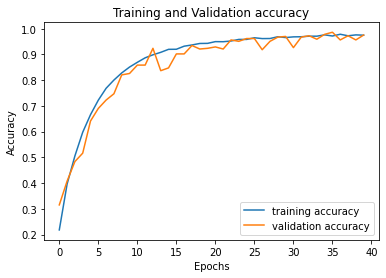

In [ ]:
import matplotlib.pyplot as plt

# Insert your code here to plot Epochs Vs. training and validation accuracy (2 Points)

plt.plot(epochs, accuracy_train, label='training accuracy')
plt.plot(epochs, accuracy_val,  label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



# Inference For Train & validation accuracy plot

It can be seen from the graph that the accuracy increases for both train and validation set as the number of epochs increases. However in case of validation set there are some minor fluctuations in the accuracy but overall the accuracy is increasing. It can be noted that as the number of epochs increases , the accuracy seems to saturate(approx 1) which is indicates that further training will not improve the accuracy much.

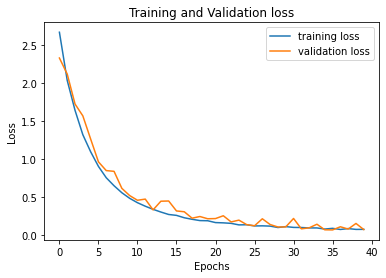

In [ ]:
# Insert your code here to plot Epochs Vs. training and validation loss (2 Points)


plt.plot(epochs, loss_train, label='training loss')
plt.plot(epochs, loss_val,  label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Inference For Training & Validation Loss

From the graph, the loss decreases as the number of epochs increase for both the training and the testing dataset. However there are some fluctuations in case of the validation set. The loss seems to tend  to 0 as the number of epochs increase , and ideally that whats we want , ie to minimise the loss.

# Prediction

---
Evaluate performance of model on the test sets.




---
**2 Points**

---





In [ ]:
# Insert your code here to get the model's performance with test set
loss , acc = model.evaluate(test_generator , steps = test_generator.samples // best_batch_size)
print("Accuracy on test dataset : ", acc * 100 , "%" )
print("Loss on test dataset :" , loss)

26/26 [==============================] - 1s 19ms/step - loss: 0.0206 - categorical_accuracy: 0.9952
Accuracy on test dataset :  99.5192289352417 %
Loss on test dataset : 0.02056676149368286


# Observations

---
Write your observations from this experiment. Also, what would be your suggestions for increasing the performance of the model ?




---
**5 Points**

---

Following are my observations:

1. Using generators for image classification reduces a lot of effort of manually creating separate functions for obtaining the images as numpy arrays.
2. The data generated using ImageDataGenerator is in batches and when we use generator for training we dont need to provide `y` separately in model.fit()
3. In the ImageDataGenerator it is important to take the color_mode="grayscale" instead of "rgb" , as in the model the input shape takes only one channel as input. This small detail caused a lot of trouble as there was error of size.
4. It is important to choose class_mode as "categorical" in ImageDataGenerator since we are predicting 26 classes here.
5. In order for flow from directory to work it very important to follow the folder structure.

Suggestions:

I would like to suggest that the parameters like shuffle , shear , rotation, etc inside the ImageDataGenerator is very crucial in determining the accuracy, basically these parameters feed the images into model by giving them more randomness which is important, this copes up with the fact if we have less training data.

Tweaking with the Hyper-Parameters during training  is  very crucial so that we could get the max accuracy.

In this lab assignment we have built a Sequential Model for classification but there are other models and papers also available for doing this same task , so I suggest that before implementing the model it is very important to research whether my model will be good according to my needs or not.

